https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

https://www.kaggle.com/bhanotkaran22/keras-cnn-data-augmentation

In [1]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [4]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [5]:
import os
import cv2
from PIL import Image

In [6]:
DATA_DIR = '/Users/sdeshpande/Desktop/image_classification/cell_images/cell_images/'
SIZE = 64
dataset = []
label = []

In [7]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [12]:
len(parasitized_images)

13780

In [8]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [13]:
len(uninfected_images)

13780

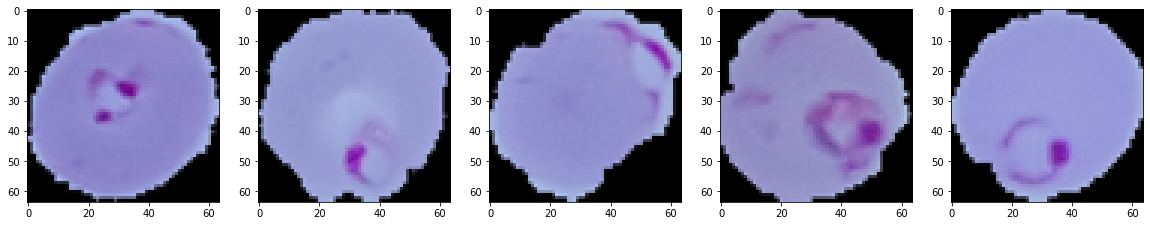

In [9]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

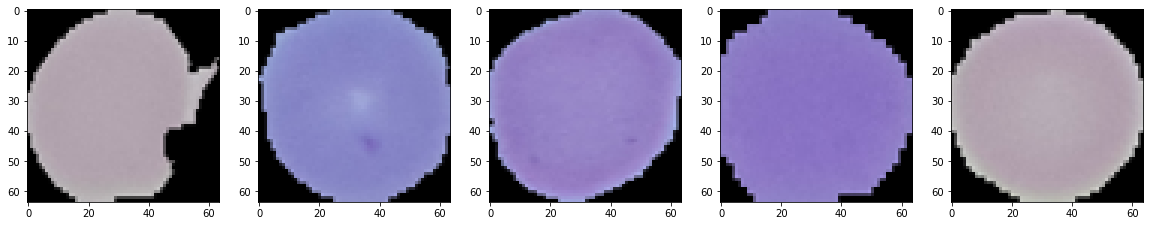

In [10]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [11]:
classifier = None
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        1

In [14]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [15]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)

Epoch 1/50
311/311 - 41s - loss: 0.4883 - accuracy: 0.7659 - val_loss: 1.6416 - val_accuracy: 0.6580
Epoch 2/50
311/311 - 40s - loss: 0.2304 - accuracy: 0.9153 - val_loss: 0.5523 - val_accuracy: 0.7764
Epoch 3/50
311/311 - 41s - loss: 0.1981 - accuracy: 0.9280 - val_loss: 0.2798 - val_accuracy: 0.8971
Epoch 4/50
311/311 - 38s - loss: 0.1782 - accuracy: 0.9351 - val_loss: 0.4464 - val_accuracy: 0.7859
Epoch 5/50
311/311 - 38s - loss: 0.1552 - accuracy: 0.9427 - val_loss: 0.2495 - val_accuracy: 0.9147
Epoch 6/50
311/311 - 38s - loss: 0.1504 - accuracy: 0.9426 - val_loss: 0.2131 - val_accuracy: 0.9193
Epoch 7/50
311/311 - 38s - loss: 0.1273 - accuracy: 0.9522 - val_loss: 0.1802 - val_accuracy: 0.9283
Epoch 8/50
311/311 - 38s - loss: 0.1164 - accuracy: 0.9547 - val_loss: 0.3393 - val_accuracy: 0.8472
Epoch 9/50
311/311 - 38s - loss: 0.1001 - accuracy: 0.9605 - val_loss: 0.2591 - val_accuracy: 0.9211
Epoch 10/50
311/311 - 38s - loss: 0.0845 - accuracy: 0.9641 - val_loss: 0.2352 - val_accura

In [16]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 2s 14ms/step - loss: 0.2587 - accuracy: 0.9570
Test_Accuracy: 95.70%


# Improving the accuracy with Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [18]:
history = classifier.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 50,
                                   shuffle = False)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
345/344 [==============================] - 42s 122ms/step - loss: 0.2421 - accuracy: 0.9230
Epoch 2/50
345/344 [==============================] - 42s 123ms/step - loss: 0.1820 - accuracy: 0.9390
Epoch 3/50
345/344 [==============================] - 42s 122ms/step - loss: 0.1744 - accuracy: 0.9401
Epoch 4/50
345/344 [==============================] - 42s 122ms/step - loss: 0.1702 - accuracy: 0.9406
Epoch 5/50
345/344 [==============================] - 44s 127ms/step - loss: 0.1645 - accuracy: 0.9436
Epoch 6/50
345/344 [==============================] - 43s 125ms/step - loss: 0.1619 - accuracy: 0.9452
Epoch 7/50
345/344 [==============================] - 43s 124ms/step - loss: 0.1585 - accuracy: 0.9454
Epoch 8/50
345/344 [==============================] - 43s 123ms/step - loss: 0.1582 - accuracy: 0.9446
Epoch 9/50
345/344 [==============================] - 42s 123ms/step - loss: 0.1561 - accuracy: 0.94

In [20]:
print("Test_Accuracy(after augmentation): {:.2f}%".format(classifier.evaluate(test_generator, steps = len(X_test), verbose = 1)[1]*100))

  87/5512 [..............................] - 2s 26ms/step - loss: 0.1133 - accuracy: 0.9585
Test_Accuracy(after augmentation): 95.85%
